<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week5/w5_fri_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [3]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [4]:
from sklearn.metrics import precision_score

precision_score(y, y_pred)

0.900990099009901

* 재현율

In [5]:
from sklearn.metrics import recall_score

recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [6]:
from sklearn.metrics import f1_score

f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [7]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.1).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

In [14]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y, custom_predict)

오차 행렬
[[267  90]
 [  6 206]]
정확도: 0.8313, 정밀도: 0.6959, 재현율: 0.9717, F1: 0.8110


* ROC 곡선 시각화

In [9]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y, pred_proba_1)

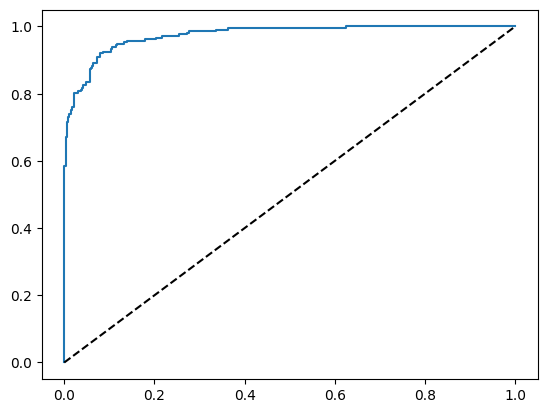

In [10]:
import matplotlib.pyplot as plt

plt.plot(fprs, tprs)
plt.plot([0,1],[0,1],'k--')

* ROC AUC 값

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_pred)

0.9012340785370753